In [116]:
import pandas as pd

In [117]:
results_df = pd.read_csv('results.csv')

In [118]:
results_df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.4864,3.8066,1.8916,0.90716,0.25000,0.30881,0.27031,1.6274,3.8483,1.8120,0.067846,0.000325,0.000325
1,2,1.3477,2.8131,1.7647,0.70469,0.48292,0.50178,0.39466,1.4057,2.5136,1.6053,0.034840,0.000652,0.000652
2,3,1.2179,2.2198,1.6630,0.71271,0.64448,0.65938,0.45320,1.3281,2.1076,1.4735,0.001826,0.000972,0.000972
3,4,1.1279,1.8159,1.5822,0.70326,0.71756,0.75149,0.48853,1.3344,1.6176,1.4606,0.000970,0.000970,0.000970
4,5,1.1229,1.5697,1.5386,0.84724,0.66461,0.81015,0.50539,1.2417,1.1856,1.3813,0.000970,0.000970,0.000970


In [119]:
max_mAP_idx = results_df['    metrics/mAP50-95(B)'].idxmax()

In [120]:
max_mAP_idx

93

In [121]:
results_df.loc[max_mAP_idx]

                  epoch    94.000000
         train/box_loss     0.428260
         train/cls_loss     0.281310
         train/dfl_loss     1.075400
   metrics/precision(B)     0.895470
      metrics/recall(B)     0.874960
       metrics/mAP50(B)     0.904930
    metrics/mAP50-95(B)     0.739270
           val/box_loss     0.887130
           val/cls_loss     0.589790
           val/dfl_loss     1.230900
                 lr/pg0     0.000089
                 lr/pg1     0.000089
                 lr/pg2     0.000089
Name: 93, dtype: float64

In [122]:
results_df.iloc[-1]

                  epoch    100.00000
         train/box_loss      0.41604
         train/cls_loss      0.26739
         train/dfl_loss      1.02920
   metrics/precision(B)      0.86875
      metrics/recall(B)      0.87227
       metrics/mAP50(B)      0.90236
    metrics/mAP50-95(B)      0.72646
           val/box_loss      0.88722
           val/cls_loss      0.60012
           val/dfl_loss      1.21560
                 lr/pg0      0.00003
                 lr/pg1      0.00003
                 lr/pg2      0.00003
Name: 99, dtype: float64

In [123]:
import pandas as pd
import numpy as np
import glob

In [124]:
labels_folder_path = "./Street Object Detector.v4i.yolov8/valid/labels"
file_txt_list = glob.glob(labels_folder_path + '/*.txt')

images_folder_path = "./Street Object Detector.v4i.yolov8/valid/images"
file_imgs_list = glob.glob(images_folder_path + '/*.jpg')

In [125]:
label_txt_path = file_txt_list[11]
img_path = file_imgs_list[11]

with open(file_path, 'r') as file:
            file_content = file.read()
            file_contents.append(file_content)

In [126]:
bboxs = list()
with open(label_txt_path, 'r') as file:
    content = file.read().split("\n")
    print(content)
    bboxs.append(content)
    # bboxs.append(content.split('\n'))
print(bboxs)

['0 0.5453125 0.6875 0.89453125 0.34296875', '0 0.365625 0.478125 0.41328125 0.046875', '0 0.84453125 0.47265625 0.3 0.046875']
[['0 0.5453125 0.6875 0.89453125 0.34296875', '0 0.365625 0.478125 0.41328125 0.046875', '0 0.84453125 0.47265625 0.3 0.046875']]


In [127]:
true_bbx = list()
for bbox in bboxs[0]:
    true_bbx.append(list(map(lambda x: float(x) * 640, bbox.split(" ")[1:])))
    print(bbox)

true_bbx = np.array(true_bbx)

0 0.5453125 0.6875 0.89453125 0.34296875
0 0.365625 0.478125 0.41328125 0.046875
0 0.84453125 0.47265625 0.3 0.046875


In [128]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [129]:
yolo_model = YOLO('./weights/best.pt')

In [130]:
results = yolo_model(img_path)


image 1/1 c:\Users\saabr\OneDrive\Escritorio\UAO\AI_Specialization_UAO\SemestreII\Vision_Compu_DL\Proyecto_Sign_Detection\Proyecto_Traffic_Sing_Detection\train-optSGD-epochs100-lr0_001\train\Street Object Detector.v4i.yolov8\valid\images\crosswalk3_jpg.rf.39f1f7e1b2546625183a64ed2f66714b.jpg: 640x640 3 crosswalks, 2538.0ms
Speed: 8.0ms preprocess, 2538.0ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


In [137]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'crosswalk', 1: 'speed bump', 2: 'speed limit sign'}
 orig_img: array([[[242, 231, 227],
         [242, 231, 227],
         [240, 231, 227],
         ...,
         [219, 201, 190],
         [221, 203, 192],
         [223, 205, 194]],
 
        [[240, 229, 225],
         [241, 230, 226],
         [238, 229, 225],
         ...,
         [221, 203, 192],
         [223, 205, 194],
         [224, 206, 195]],
 
        [[240, 230, 223],
         [240, 229, 225],
         [240, 229, 225],
         ...,
         [223, 207, 195],
         [224, 208, 196],
         [225, 209, 197]],
 
        ...,
 
        [[ 79,  83,  88],
         [ 85,  89,  94],
         [ 90,  94,  99],
         ...,
         [ 84,  95, 103],
         [ 87,  98, 106],
         [ 90, 101, 109]],
 
        [[ 85,  89,  94],
         [ 86,  90,  95],
         [ 87,  91,  96],


In [131]:
for r in results:
    dtt_bbx = r.boxes.xywh.numpy()
    print(dtt_bbx.shape)


(3, 4)


In [132]:
dtt_bbx

array([[     345.18,      439.57,      589.64,      228.37],
       [     537.72,      302.05,      203.17,      32.645],
       [     198.06,      304.82,      186.13,      34.271]], dtype=float32)

cajas = resultado[0]['rois']
ids = resultado[0]['class_ids']

plt.imshow(img)
ax = plt.gca()
for bb, id in zip(cajas, ids):
  y1, x1, y2, x2 = bb
  w = x2-x1
  h = y2-y1
  rect = Rectangle((x1,y1), w, h, fill=False, color='red')
  ax.add_patch(rect)
  ax.annotate(CLASS_NAMES[id], (x1,y1), color='w', weight='bold', fontsize=6, ha='center',
              va='center')

plt.show()

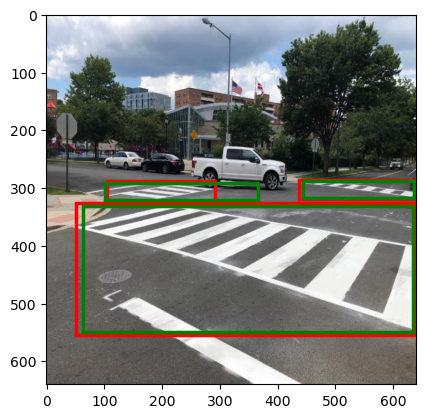

In [133]:
img = plt.imread(img_path)

plt.imshow(img)
ax = plt.gca()
for dtt_bbx_i in dtt_bbx:
    x, y, w, h = dtt_bbx_i
    rect = Rectangle((x-w/2,y-h/2), w, h, fill=False, color='red', linewidth=2.5)
    ax.add_patch(rect)

for dtt_bbx_i in true_bbx:
    x, y, w, h = dtt_bbx_i
    rect = Rectangle((x-w/2,y-h/2), w, h, fill=False, color='green', linewidth=2.5)
    ax.add_patch(rect)
plt.show()

In [134]:
# Define two bounding boxes as (x1, y1, x2, y2) where (x1, y1) is the top-left corner, and (x2, y2) is the bottom-right corner.
bbox1 = (10, 10, 50, 50)  # Format: (x1, y1, x2, y2)
bbox2 = (30, 30, 70, 70)

# Calculate the intersection coordinates
x1_int = max(bbox1[0], bbox2[0])
y1_int = max(bbox1[1], bbox2[1])
x2_int = min(bbox1[2], bbox2[2])
y2_int = min(bbox1[3], bbox2[3])

# Calculate the area of intersection
intersection_area = max(0, x2_int - x1_int) * max(0, y2_int - y1_int)

# Calculate the area of each bounding box
area_bbox1 = (bbox1[2] - bbox1[0]) * (bbox1[3] - bbox1[1])
area_bbox2 = (bbox2[2] - bbox2[0]) * (bbox2[3] - bbox2[1])

# Calculate the union area
union_area = area_bbox1 + area_bbox2 - intersection_area

# Calculate the Intersection over Union (IoU)
iou = intersection_area / union_area

print("Intersection over Union (IoU):", iou*100)


Intersection over Union (IoU): 14.285714285714285


In [135]:
def IoU(box1, box2):
  #coordenadas de la intersección
  x1I = max(box1[0], box2[0])
  y1I = max(box1[1], box2[1])
  x2I = min(box1[2], box2[2])
  y2I = min(box1[3], box2[3])

  #area del rectangulo de la intersección
  interArea = max(0, x2I-x1I+1)*max(0, y2I-y1I+1)

  #areas de los bbox groundtruth y el propuesto
  box1Area = (box1[2]-box1[0]+1)*(box1[3]-box1[1]+1)
  box2Area = (box2[2]-box2[0]+1)*(box2[3]-box2[1]+1)

  #calcular la interseccion sobre la union
  iou = interArea / float(box1Area+box2Area-interArea)

  return iou

In [136]:
print(IoU(bbox1, bbox2))

0.15097569325573434
